In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -r requirements.txt

     |████████████████████████████████| 102kB 5.7MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 49.5MB 62kB/s 
     |████████████████████████████████| 2.2MB 52.7MB/s 
     |████████████████████████████████| 1.3MB 45.8MB/s 
     |████████████████████████████████| 276kB 57.8MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 25.9MB 119kB/s 
     |████████████████████████████████| 320.4MB 49kB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=cec51962836640e6b3e15545d02f94a53049a7e36d3d6ada8eed7f91bcc95120
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.10 which i

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

import warnings
warnings.filterwarnings('ignore')

In [3]:
A_images = []
B_images = []
C_images = []
for folder in os.listdir("/content/drive/My Drive/ASL"):
  for image in os.listdir(f"/content/drive/My Drive/ASL/{folder}"):
    if folder == 'A':
      img = cv2.imread(f"/content/drive/My Drive/ASL/{folder}/{image}")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (100,100))
      A_images.append(img)
    elif folder == 'B':
      img = cv2.imread(f"/content/drive/My Drive/ASL/{folder}/{image}")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (100,100))
      B_images.append(img)
    else:
      img = cv2.imread(f"/content/drive/My Drive/ASL/{folder}/{image}")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (100,100))
      C_images.append(img)

In [4]:
A_images = np.asarray(A_images)
B_images = np.asarray(B_images)
C_images = np.asarray(C_images)


In [5]:
A_images = A_images.reshape((1000,100,100,1))
B_images = B_images.reshape((1000,100,100,1))
C_images = C_images.reshape((1000,100,100,1))
A_images.shape, B_images.shape, C_images.shape

((1000, 100, 100, 1), (1000, 100, 100, 1), (1000, 100, 100, 1))

In [6]:

a_labels = np.asarray([0]*len(A_images))
b_labels = np.asarray([1]*len(B_images))
c_labels = np.asarray([2]*len(C_images))

In [7]:
a_labels.shape, c_labels.shape, c_labels.shape

((1000,), (1000,), (1000,))

In [8]:
images = np.vstack((A_images, B_images, C_images))
labels = np.hstack((a_labels, b_labels, c_labels))

In [9]:
images.shape, labels.shape


((3000, 100, 100, 1), (3000,))

In [10]:
images, labels = shuffle(images, labels)

[1 1 2 1 2 1 0 1 2 0 1 1 0 0 1 2]


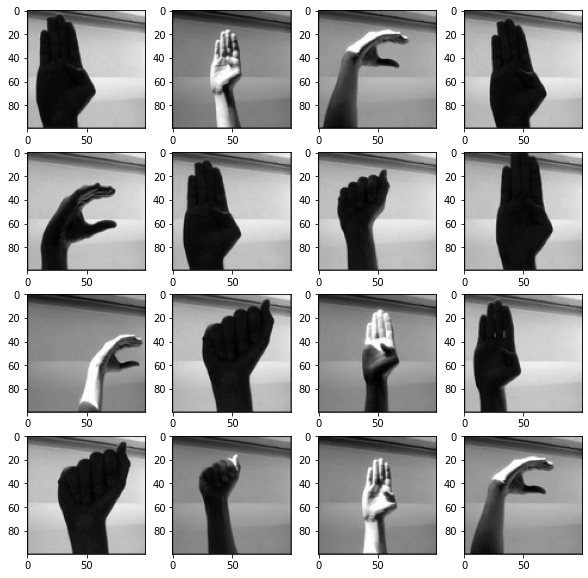

In [11]:
print(labels[:16])
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i].reshape((100,100)), cmap = "gray")
plt.show()


In [12]:
from keras.utils import to_categorical
labels = to_categorical(labels, 3)

In [13]:
labels.shape

(3000, 3)

In [14]:
images = images / 255.0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 100, 100, 1), (2400, 3), (600, 100, 100, 1), (600, 3))

In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(3, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
38/38 [==============================] - 1s 31ms/step - loss: 0.7235 - accuracy: 0.6800 - val_loss: 0.1555 - val_accuracy: 0.9400
Epoch 2/3
38/38 [==============================] - 1s 23ms/step - loss: 0.0527 - accuracy: 0.9846 - val_loss: 0.0527 - val_accuracy: 0.9867
Epoch 3/3
38/38 [==============================] - 1s 23ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 9.0581e-04 - val_accuracy: 1.0000


In [19]:
print(np.argmax(y_test[300]))
print(np.argmax(model.predict(X_test[300].reshape((1,100,100,1)))))

1
1


In [20]:

model_json = model.to_json()
with open("ASL_Model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
model.save_weights("ASL_Model_weights.h5")